In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Missing data

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data as we can see.

## Target variable

In [7]:
print('Unique target values: ',df['quality'].unique())

Unique target values:  [5 6 7 4 8 3]


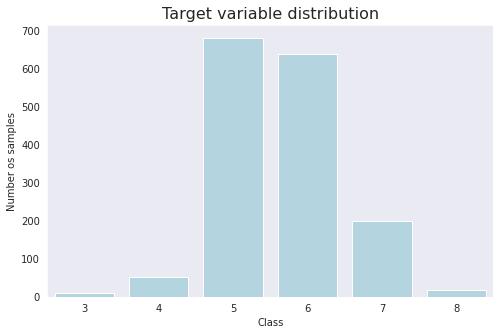

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['quality'], color='lightblue')
ax.set_title('Target variable distribution', fontsize=16)
ax.set_xlabel('Class')
ax.set_ylabel('Number os samples')
plt.show()

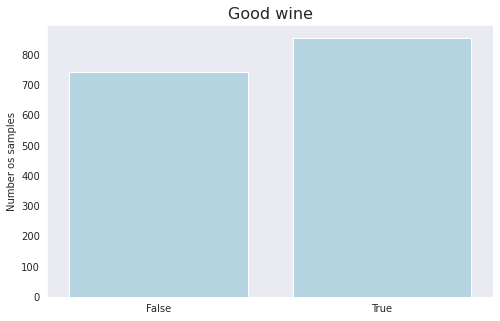

In [9]:
df['good'] = df['quality'] > 5
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['good'], color='lightblue')
ax.set_title('Good wine', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Number os samples')
plt.show()

In [10]:
df.drop('quality', axis=1, inplace=True)

## Pairwise comparison

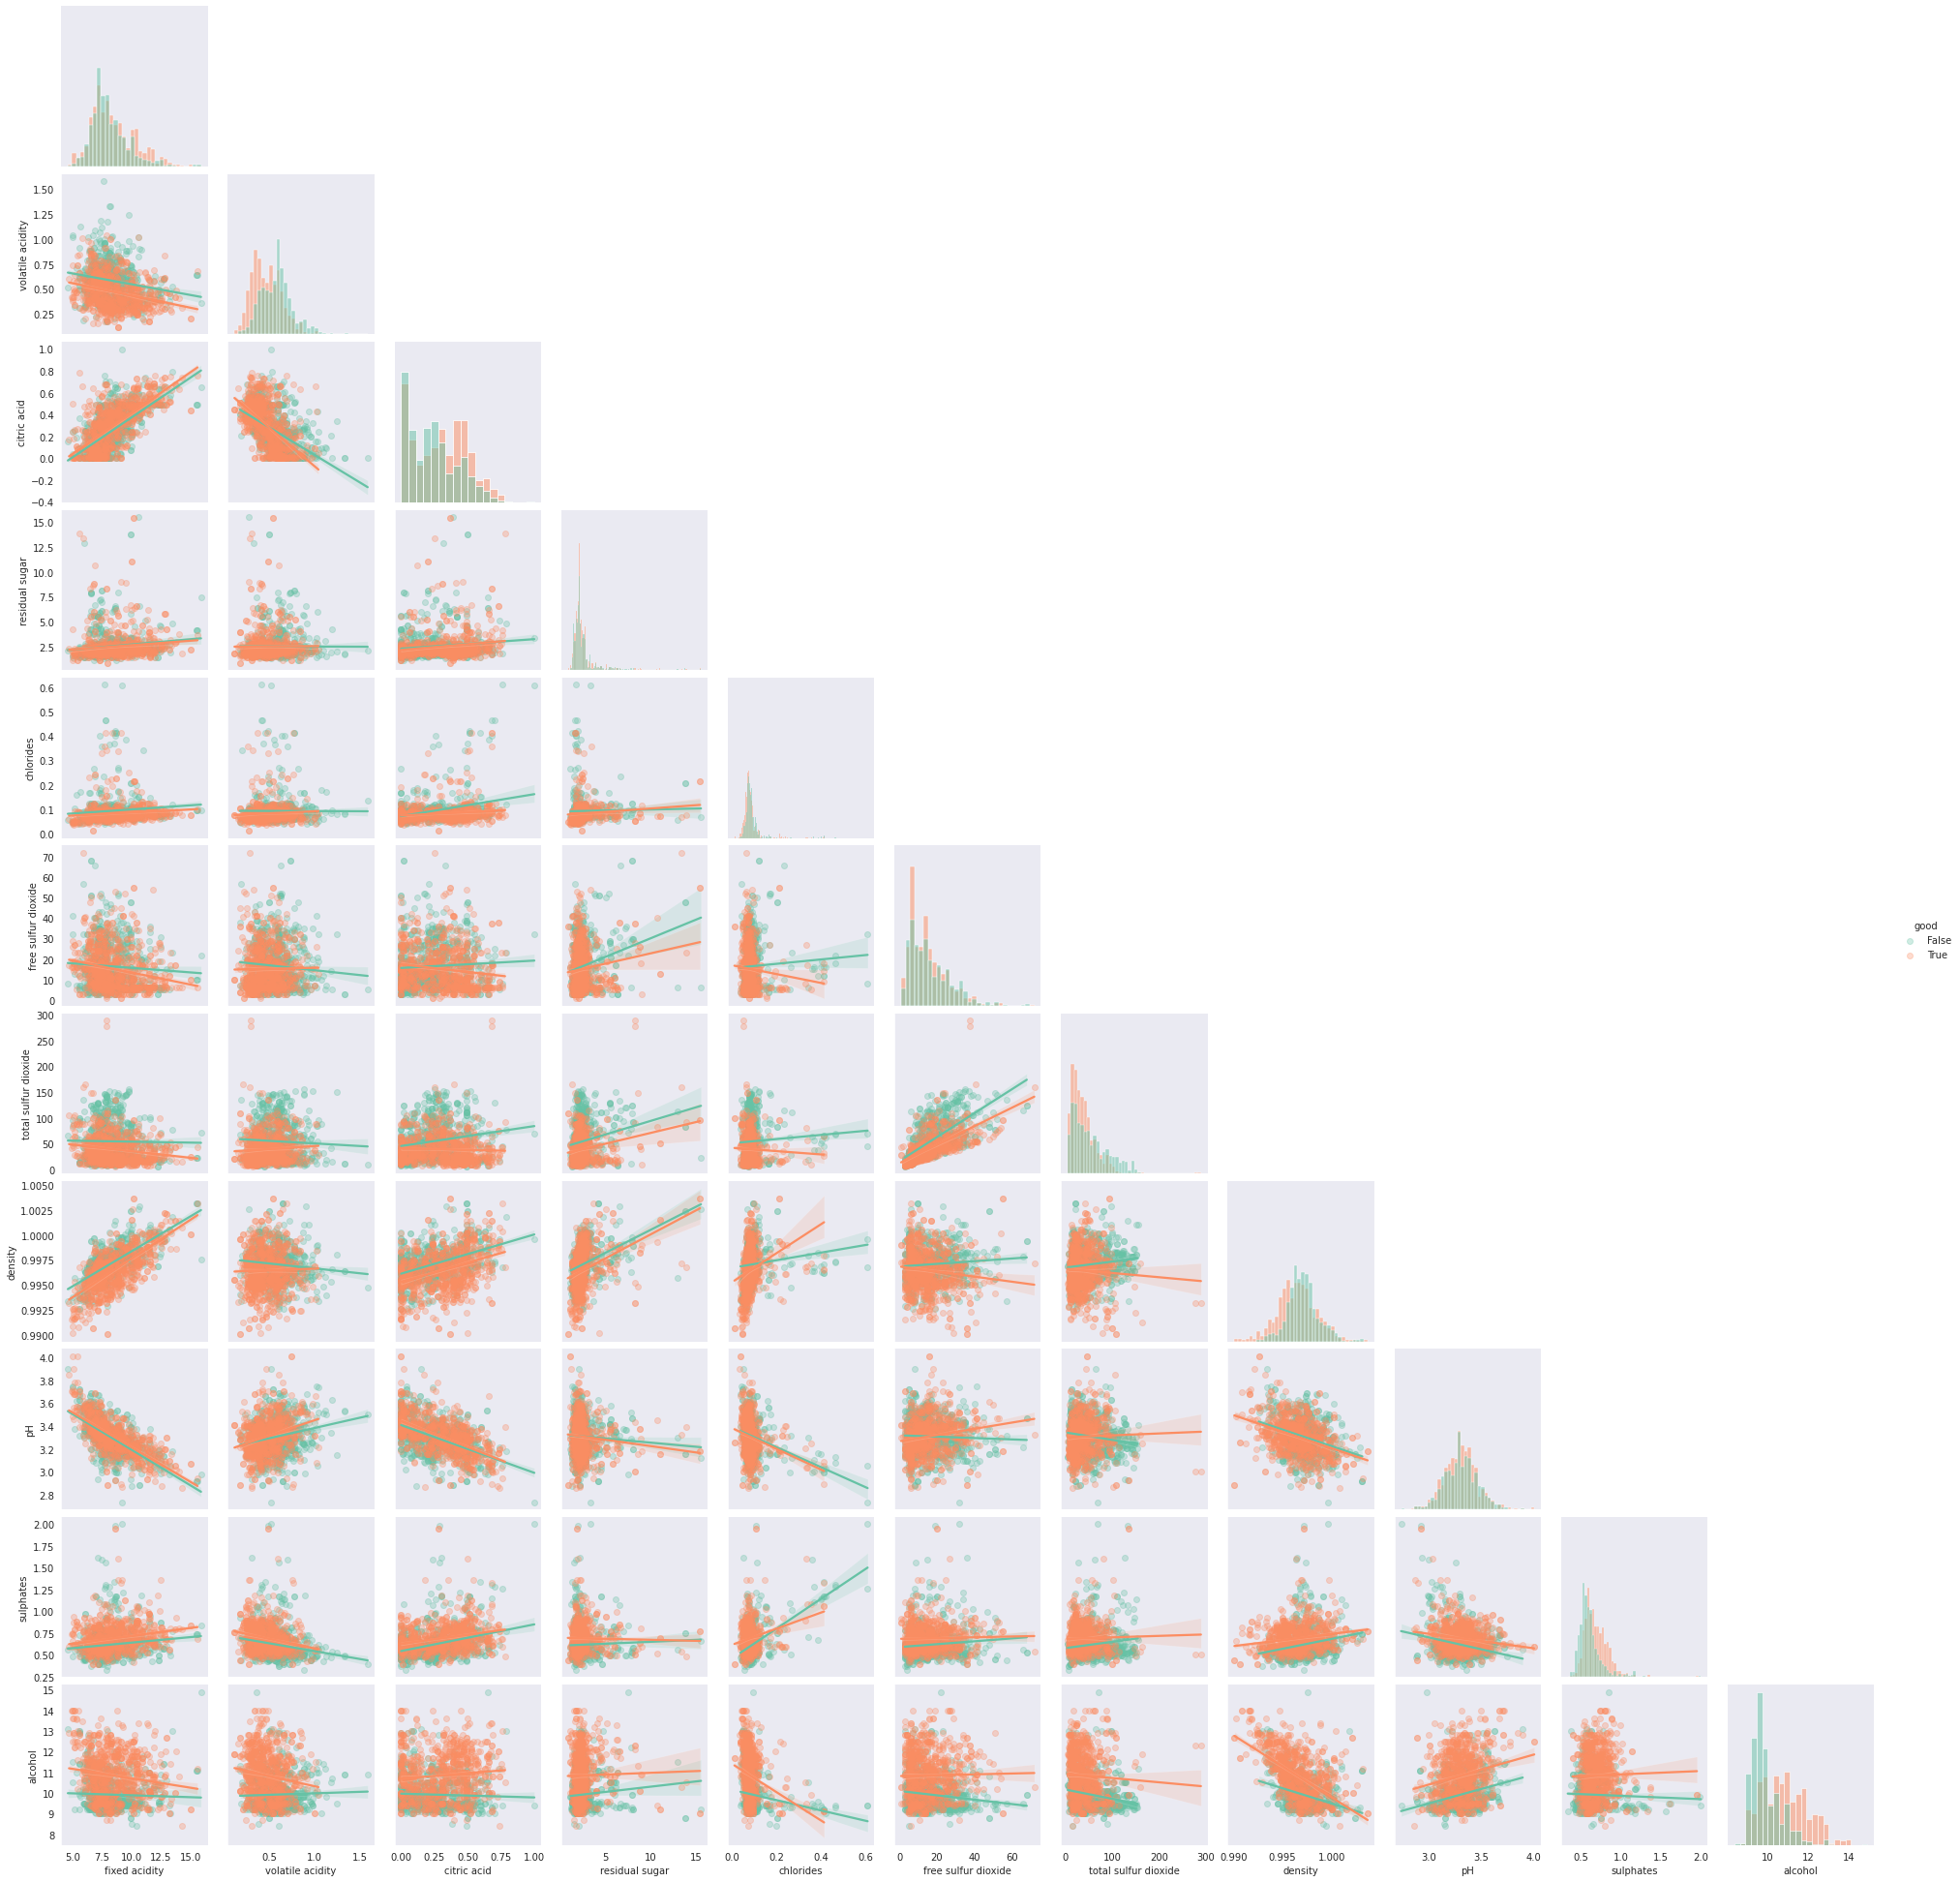

In [11]:
feat_cols = df.columns.drop('good').to_list()

sns.pairplot(df, hue='good', diag_kind="hist", palette='Set2', kind='reg', corner=True, plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

## Boxplot

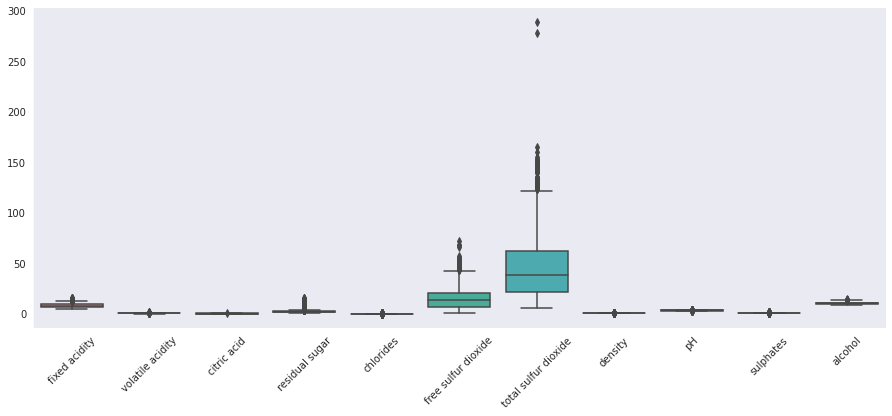

In [12]:
sns.set_style("dark")
ax = sns.catplot(data=df[feat_cols], kind='box', height=5, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

## Analysis of normality

In [13]:
def eda_feature(feat:pd.Series):
    # Figure & axis
    fig, ax = plt.subplot_mosaic([['up', 'right'],['down', 'right']],
                                  constrained_layout=True, figsize=(11,4),
                                  gridspec_kw={"height_ratios": (.15, .85)})

    # Histogram
    sns.histplot(data=feat, bins=20, kde=True, stat="percent", ax=ax['down'])
    ax['down'].set_xlabel(feat.name.title())

    # Boxplot
    sns.boxplot(x=feat, ax=ax['up'])
    ax['up'].set_xlabel('')
    ax['up'].set_xticklabels('')


    # QQ plot
    sm.qqplot(feat, fit=True, line="45", alpha=0.2, ax=ax['right'])
    ax['right'].set_title('QQ plot')
    ax['right'].yaxis.set_label_position("right")
    ax['right'].yaxis.set_ticks_position("right")

    # Title
    fig.suptitle(f'Feature: "{feat.name.title()}"', fontsize=16, ha='center')
    sns.set_style("dark")
    plt.show()

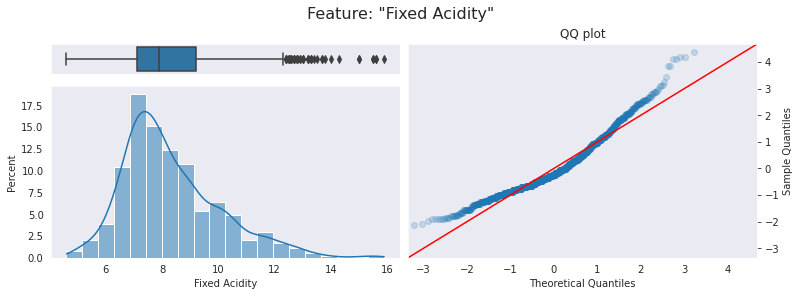

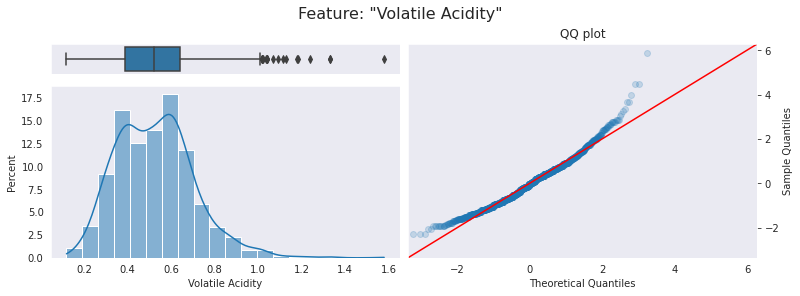

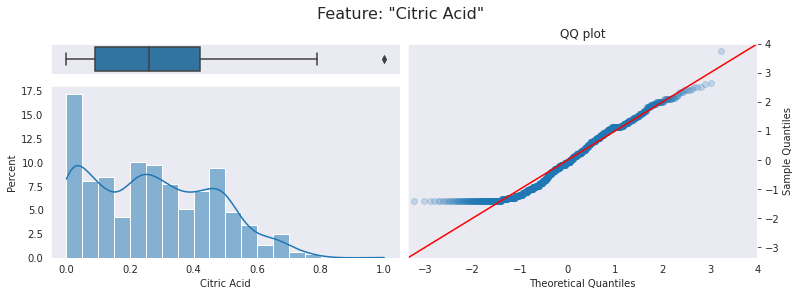

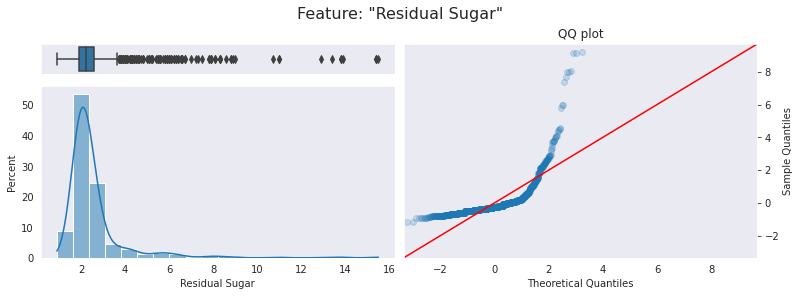

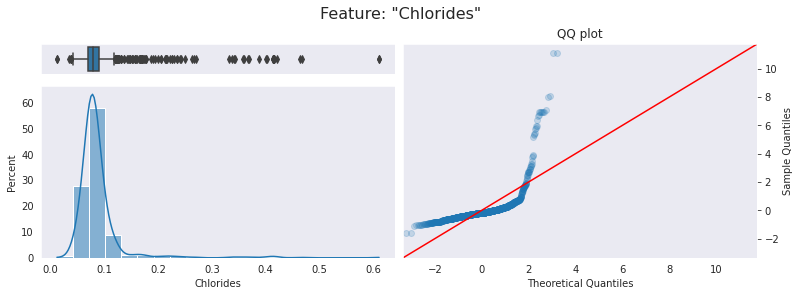

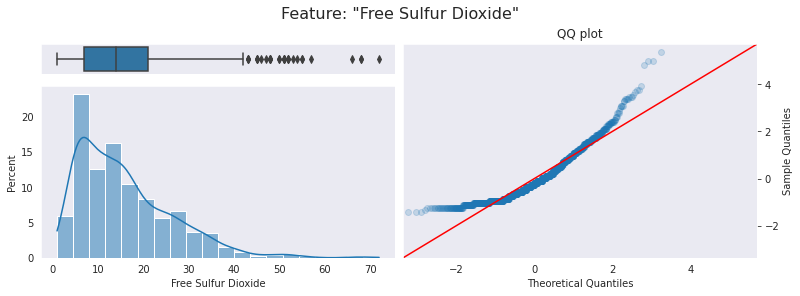

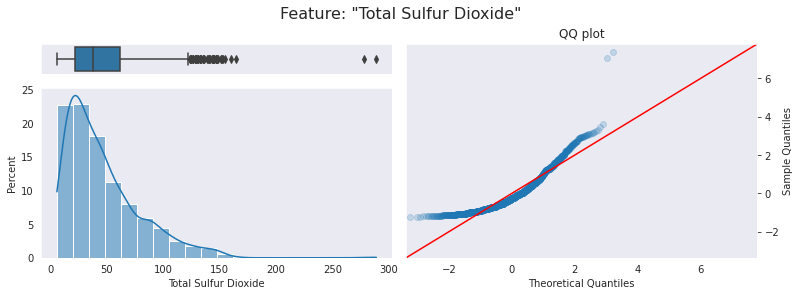

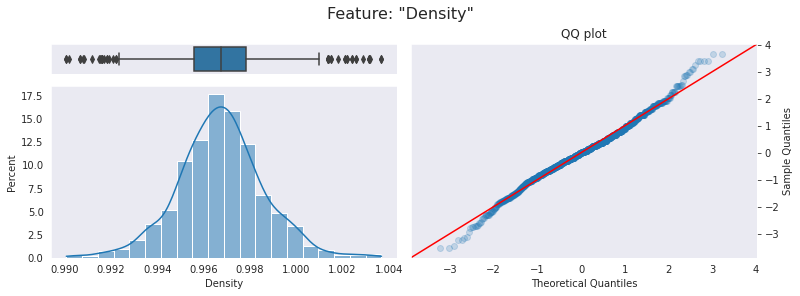

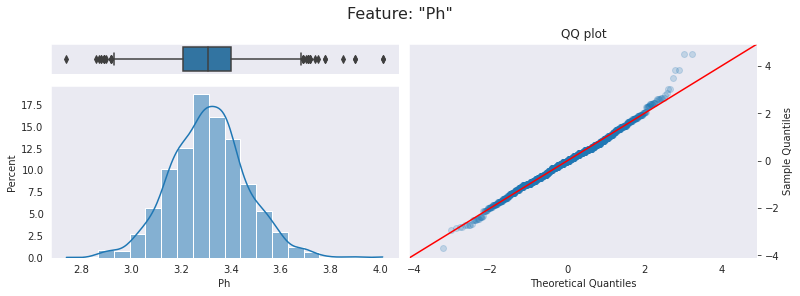

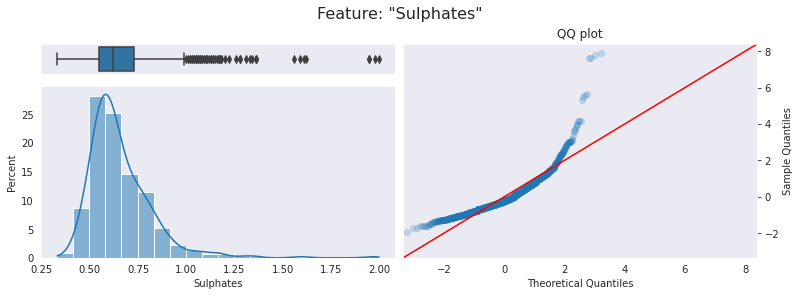

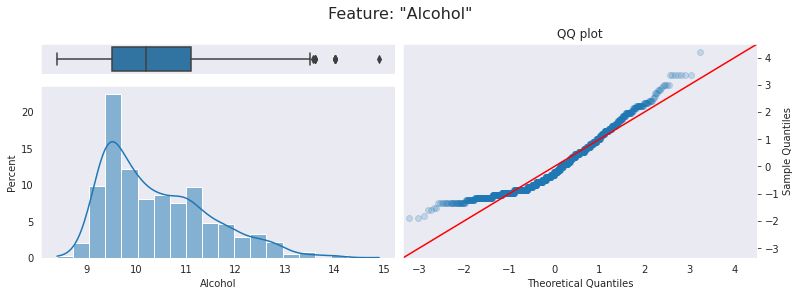

In [14]:
for feat in df.columns.drop('good'):
    eda_feature(df[feat])

In [15]:
from scipy.stats import shapiro

for feat in df.columns.drop('good'):
    print(f'P-value for "{feat}" feature is {shapiro(df[feat]).pvalue:.4f}')


P-value for "fixed acidity" feature is 0.0000
P-value for "volatile acidity" feature is 0.0000
P-value for "citric acid" feature is 0.0000
P-value for "residual sugar" feature is 0.0000
P-value for "chlorides" feature is 0.0000
P-value for "free sulfur dioxide" feature is 0.0000
P-value for "total sulfur dioxide" feature is 0.0000
P-value for "density" feature is 0.0000
P-value for "pH" feature is 0.0000
P-value for "sulphates" feature is 0.0000
P-value for "alcohol" feature is 0.0000


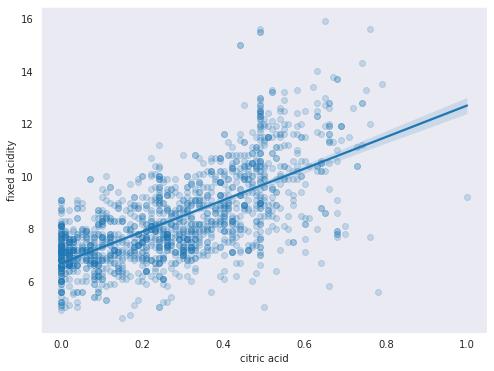

In [16]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x='citric acid', y='fixed acidity', data=df, scatter_kws={'alpha':0.2})
plt.show()

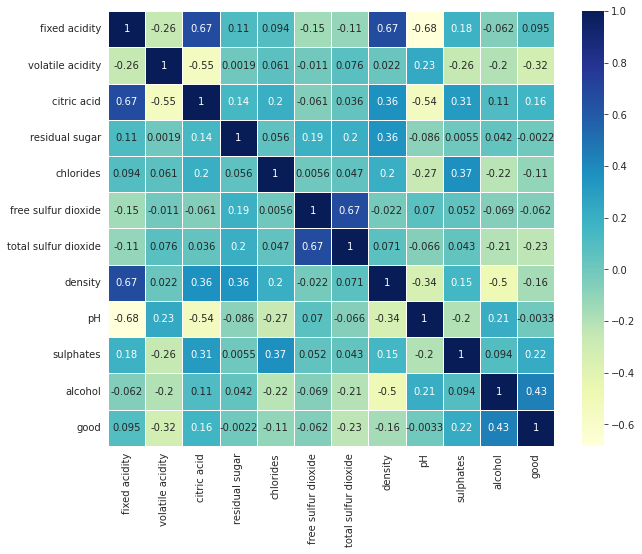

In [17]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), linewidths=.5, cmap="YlGnBu", annot=True)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
n_pca = df.shape[1]-1

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_pca))])
pca_comp = pipeline.fit_transform(df.drop('good', axis=1))
pca_dict = {f'pca{i+1}':pca_comp[:,i] for i in range(n_pca)}
pca_dict['good'] = df['good'].values
pca_df = pd.DataFrame(pca_dict)
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    1599 non-null   float64
 1   pca2    1599 non-null   float64
 2   pca3    1599 non-null   float64
 3   pca4    1599 non-null   float64
 4   pca5    1599 non-null   float64
 5   pca6    1599 non-null   float64
 6   pca7    1599 non-null   float64
 7   pca8    1599 non-null   float64
 8   pca9    1599 non-null   float64
 9   pca10   1599 non-null   float64
 10  pca11   1599 non-null   float64
 11  good    1599 non-null   bool   
dtypes: bool(1), float64(11)
memory usage: 139.1 KB


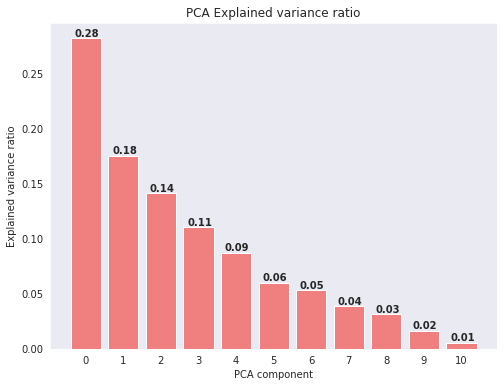

In [20]:
pca_var = pipeline['pca'].explained_variance_ratio_
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(x=range(n_pca), height=pca_var, color='lightcoral')
ax.set_xlabel('PCA component')
ax.set_ylabel('Explained variance ratio')
ax.set_title('PCA Explained variance ratio')
ax.set_xticks(list(range(n_pca)))

for i, v in enumerate(pca_var):
    ax.text(i-0.3, v+0.002, f'{v:.2f}', fontweight='bold')
plt.show()

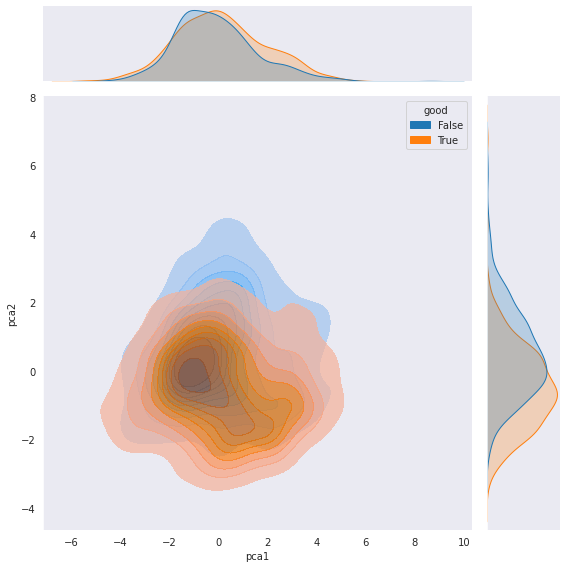

In [21]:
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue='good', kind='kde', fill=True, joint_kws={'alpha': 0.7}, height=8)
plt.show()

## Create train/test data

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('good', axis=1)
y = df['good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])

Train samples:  1279
Test samples:  320


## k-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

score_types = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Model pipe -> Standarization + k-NN
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=3))])
knn_score = cross_validate(knn_pipe, X_train, y_train, scoring=score_types, return_train_score=True, cv=5, n_jobs=16)

In [24]:
def show_mean_scores(scores):
    scores_dict = {'train':{}, 'test':{}}
    for k, v in scores.items():
        if 'train' in k:
            scores_dict['train'][k.split('_')[1]] = np.mean(v)
        elif 'test' in k:
            scores_dict['test'][k.split('_')[1]] = np.mean(v)
    return pd.DataFrame(scores_dict)

show_mean_scores(knn_score)

,train,test
accuracy,0.854965,0.712276
precision,0.857265,0.710017
recall,0.870564,0.770610
f1,0.863817,0.738675
roc,0.934743,0.778564


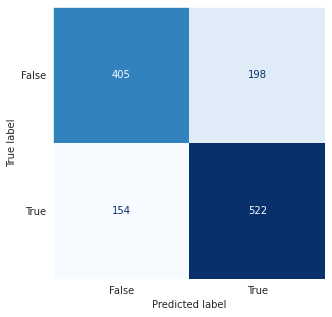

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = cross_val_predict(knn_pipe, X_train, y_train, cv=10, n_jobs=8)
plt.figure(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, colorbar=False, cmap='Blues', ax=plt.gca())
plt.grid(False)
plt.show()

### Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__n_neighbors':np.arange(1,22,2)}
print(parameters)

knn_gs = GridSearchCV(knn_pipe, parameters, scoring='accuracy', cv=5, n_jobs=8, refit='accuracy')
knn_gs.fit(X_train, y_train)

{'clf__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])}


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=8,
             param_grid={'clf__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])},
             refit='accuracy', scoring='accuracy')

In [27]:
results = pd.DataFrame(knn_gs.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007455,0.001007,0.018407,0.002189,1,{'clf__n_neighbors': 1},0.722656,0.718750,0.753906,0.792969,0.756863,0.749029,0.026938,1
5,0.009428,0.002677,0.034515,0.012444,11,{'clf__n_neighbors': 11},0.722656,0.730469,0.738281,0.718750,0.752941,0.732619,0.012176,2
6,0.007766,0.000369,0.033794,0.009169,13,{'clf__n_neighbors': 13},0.714844,0.726562,0.734375,0.714844,0.768627,0.731850,0.019826,3
7,0.007593,0.000286,0.031841,0.007667,15,{'clf__n_neighbors': 15},0.718750,0.714844,0.730469,0.699219,0.768627,0.726382,0.023369,4
3,0.012036,0.009452,0.028166,0.008152,7,{'clf__n_neighbors': 7},0.714844,0.722656,0.726562,0.714844,0.745098,0.724801,0.011117,5
4,0.009238,0.002710,0.041231,0.013621,9,{'clf__n_neighbors': 9},0.703125,0.738281,0.738281,0.710938,0.729412,0.724007,0.014447,6
8,0.008042,0.000299,0.036080,0.011460,17,{'clf__n_neighbors': 17},0.687500,0.714844,0.730469,0.703125,0.768627,0.720913,0.027704,7
2,0.008065,0.000059,0.025355,0.002415,5,{'clf__n_neighbors': 5},0.722656,0.718750,0.722656,0.710938,0.729412,0.720882,0.006041,8
9,0.010946,0.004018,0.052692,0.014314,19,{'clf__n_neighbors': 19},0.675781,0.710938,0.738281,0.703125,0.764706,0.718566,0.030479,9
10,0.010920,0.004108,0.037450,0.007254,21,{'clf__n_neighbors': 21},0.671875,0.703125,0.722656,0.714844,0.749020,0.712304,0.025221,10


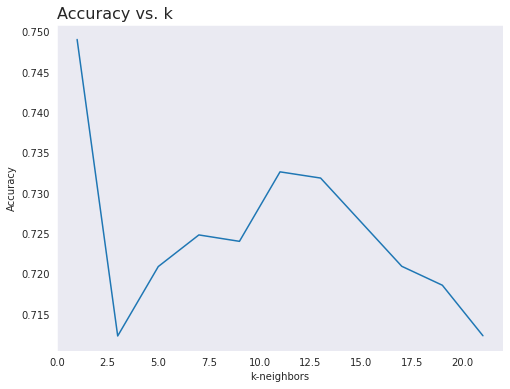

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(x = 'param_clf__n_neighbors', y='mean_test_score', data=results, ax=ax)
ax.set_title('Accuracy vs. k', loc='left', fontsize=16)
ax.set_xlabel('k-neighbors')
ax.set_ylabel('Accuracy')
plt.show()

In [29]:
best_knn = knn_gs.best_estimator_

## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

# Model pipe -> Standarization + Logistic regressor
lr_pipe = Pipeline([('scaler', StandardScaler()),
                     ('clf', LogisticRegression())])
lr_score = cross_validate(lr_pipe, X_train, y_train, scoring=score_types, return_train_score=True, cv=5, n_jobs=16)

show_mean_scores(lr_score)

,train,test
accuracy,0.750199,0.744387
precision,0.768630,0.761217
recall,0.754444,0.751536
f1,0.761465,0.755958
roc,0.822920,0.813556


In [31]:
parameters = {'clf__C': np.logspace(-3,3,7)}
print(parameters)

logreg_gs = GridSearchCV(lr_pipe, parameters, scoring='accuracy', cv=5, n_jobs=8, refit='accuracy')
logreg_gs.fit(X_train, y_train)

{'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=8,
             param_grid={'clf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy', scoring='accuracy')

In [32]:
results = pd.DataFrame(logreg_gs.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.022541,0.006233,0.004956,0.004188,0.01,{'clf__C': 0.01},0.714844,0.718750,0.730469,0.742188,0.815686,0.744387,0.036911,1
3,0.028007,0.004910,0.006447,0.005477,1.0,{'clf__C': 1.0},0.714844,0.718750,0.722656,0.750000,0.815686,0.744387,0.037729,1
5,0.013464,0.001032,0.002876,0.000050,100.0,{'clf__C': 100.0},0.714844,0.718750,0.722656,0.746094,0.815686,0.743606,0.037645,3
6,0.015025,0.000830,0.002684,0.000554,1000.0,{'clf__C': 1000.0},0.714844,0.718750,0.722656,0.746094,0.815686,0.743606,0.037645,3
2,0.026042,0.002392,0.007731,0.004044,0.1,{'clf__C': 0.1},0.714844,0.726562,0.722656,0.742188,0.811765,0.743603,0.035226,5
4,0.015496,0.002390,0.002922,0.000051,10.0,{'clf__C': 10.0},0.714844,0.718750,0.722656,0.746094,0.811765,0.742822,0.036146,6
0,0.028534,0.008007,0.004988,0.003671,0.001,{'clf__C': 0.001},0.710938,0.710938,0.742188,0.726562,0.780392,0.734203,0.025838,7


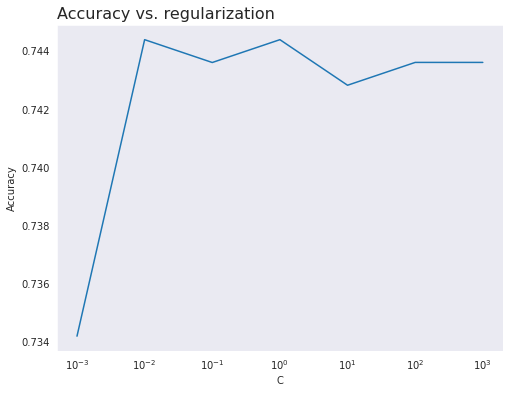

In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(x = 'param_clf__C', y='mean_test_score', data=results, ax=ax)
ax.set_title('Accuracy vs. regularization', loc='left', fontsize=16)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')
plt.show()

In [34]:
best_logreg = logreg_gs.best_estimator_

## SVM

In [35]:
from sklearn.svm import SVC

# Model pipe -> Standarization + SVM
svm_pipe = Pipeline([('scaler', StandardScaler()),
                     ('clf', SVC(kernel='sigmoid'))])
svm_score = cross_validate(svm_pipe, X_train, y_train, scoring=score_types, return_train_score=True, cv=5, n_jobs=16)

show_mean_scores(svm_score)

,train,test
accuracy,0.643864,0.652089
precision,0.664575,0.680903
recall,0.658279,0.643573
f1,0.661323,0.661497
roc,0.678565,0.698189


### Hyperparameter tuning

In [36]:
parameters = {'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm_gs = GridSearchCV(svm_pipe, parameters, scoring='accuracy', cv=5, n_jobs=8, refit='accuracy')
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid={'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='accuracy', scoring='accuracy')

In [37]:
results = pd.DataFrame(svm_gs.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.138929,0.002344,0.043110,0.006141,rbf,{'clf__kernel': 'rbf'},0.734375,0.722656,0.730469,0.746094,0.835294,0.753778,0.041454,1
1,0.099740,0.033670,0.017901,0.007348,poly,{'clf__kernel': 'poly'},0.726562,0.710938,0.730469,0.730469,0.792157,0.738119,0.027963,2
0,0.111375,0.012988,0.020822,0.007691,linear,{'clf__kernel': 'linear'},0.699219,0.718750,0.722656,0.746094,0.796078,0.736559,0.033281,3
3,0.171361,0.014117,0.039461,0.007976,sigmoid,{'clf__kernel': 'sigmoid'},0.601562,0.679688,0.656250,0.648438,0.674510,0.652089,0.027741,4


In [38]:
best_svm = svm_gs.best_estimator_

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Model -> Random Forest classifier only. We do not standarize the input data since it is not neccesary for RF.
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)
rf_score = cross_validate(rf_clf, X_train, y_train, scoring=score_types, return_train_score=True, cv=5, n_jobs=16)

show_mean_scores(rf_score)

,train,test
accuracy,0.832684,0.772525
precision,0.856801,0.793693
recall,0.820632,0.770708
f1,0.838279,0.781911
roc,0.918033,0.839141


### Hyperparameter tuning

In [40]:
parameters = {'max_depth': np.arange(2,16,1),
              'max_features': np.arange(1,7,1)}

rf_gs = GridSearchCV(rf_clf, parameters, scoring='accuracy', cv=5, n_jobs=8, refit='accuracy')
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=8,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'max_features': array([1, 2, 3, 4, 5, 6])},
             refit='accuracy', scoring='accuracy')

In [41]:
results = pd.DataFrame(rf_gs.cv_results_)
results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,1.027900,0.019216,0.052440,0.003985,13,5,"{'max_depth': 13, 'max_features': 5}",0.804688,0.804688,0.804688,0.828125,0.870588,0.822555,0.025675,1
63,0.913375,0.018850,0.050262,0.006721,12,4,"{'max_depth': 12, 'max_features': 4}",0.816406,0.796875,0.796875,0.824219,0.862745,0.819424,0.024190,2
69,0.861681,0.335684,0.046740,0.013418,13,4,"{'max_depth': 13, 'max_features': 4}",0.792969,0.804688,0.789062,0.816406,0.878431,0.816311,0.032500,3
66,0.635848,0.020440,0.068845,0.023981,13,1,"{'max_depth': 13, 'max_features': 1}",0.785156,0.820312,0.800781,0.816406,0.854902,0.815512,0.023298,4
56,0.799696,0.172773,0.055348,0.002280,11,3,"{'max_depth': 11, 'max_features': 3}",0.800781,0.808594,0.781250,0.824219,0.858824,0.814733,0.026028,5


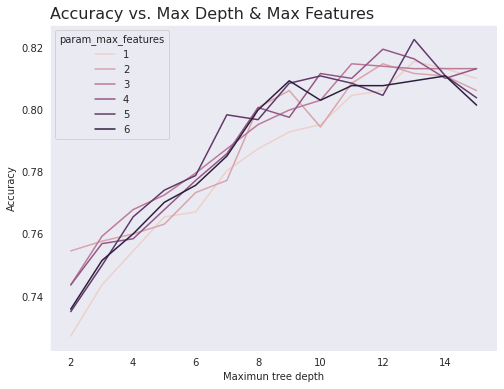

In [42]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(x = 'param_max_depth', y='mean_test_score', hue= 'param_max_features', data=results, ax=ax)
ax.set_title('Accuracy vs. Max Depth & Max Features', loc='left', fontsize=16)
ax.set_xlabel('Maximun tree depth')
ax.set_ylabel('Accuracy')
plt.show()

In [43]:
best_rf = rf_gs.best_estimator_

### Feature Importance

In [44]:
feat_imp = pd.DataFrame({'Importance': best_rf.feature_importances_}, index=best_rf.feature_names_in_).sort_values('Importance', ascending=False)
feat_imp

,Importance
alcohol,0.209246
sulphates,0.145065
volatile acidity,0.102895
total sulfur dioxide,0.102684
density,0.080468
chlorides,0.070592
pH,0.062644
fixed acidity,0.062352
citric acid,0.060110
free sulfur dioxide,0.052779


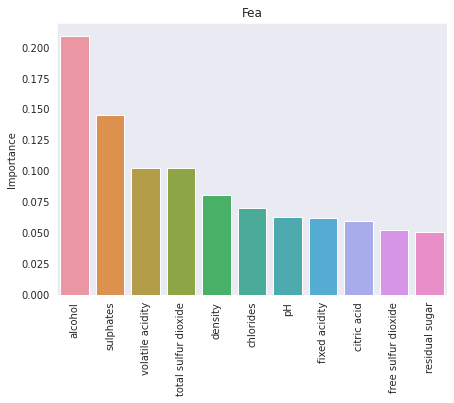

In [45]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=feat_imp.index, y='Importance', data=feat_imp, ax=ax)
ax.set_xticklabels(feat_imp.index, rotation=90)
ax.set_title('Fea')
plt.show()

In [46]:
classifiers = {'kNN': best_knn, 'SVC': best_svm, 'Logreg': best_logreg, 'Random Forest': best_rf}
scores = {}

for clf_name, clf in classifiers.items():
    clf_scores = cross_validate(clf, X_train, y_train, scoring=score_types, cv=10, n_jobs=16)
    test_accuracy = clf_scores['test_accuracy']
    print(f'{clf_name} model fitted...')
    for metric in score_types:
        scores[(clf_name, metric)] = clf_scores['test_'+metric]

kNN model fitted...
SVC model fitted...
Logreg model fitted...
Random Forest model fitted...


In [47]:
df_scores = pd.DataFrame(scores)
df_scores

kNN                                               SVC            \
   accuracy precision    recall        f1   roc_auc  accuracy precision   
0  0.765625  0.737500  0.867647  0.797297  0.758824  0.734375  0.757576   
1  0.679688  0.714286  0.661765  0.687023  0.680882  0.734375  0.742857   
2  0.742188  0.777778  0.720588  0.748092  0.743627  0.750000  0.781250   
3  0.710938  0.731343  0.720588  0.725926  0.710294  0.718750  0.742424   
4  0.796875  0.808824  0.808824  0.808824  0.796078  0.742188  0.807018   
5  0.742188  0.777778  0.720588  0.748092  0.743627  0.750000  0.757143   
6  0.781250  0.782609  0.805970  0.794118  0.780034  0.750000  0.769231   
7  0.789062  0.777778  0.835821  0.805755  0.786763  0.765625  0.776119   
8  0.773438  0.806452  0.746269  0.775194  0.774774  0.851562  0.852941   
9  0.748031  0.761194  0.761194  0.761194  0.747264  0.826772  0.857143   

                                   Logreg                                \
     recall        f1   roc_auc  accuracy precision    recall        f1   
0  0.735294  0.746269  0.798284  0.710938  0.731343  0.720588  0.725926   
1  0.764706  0.753623  0.805147  0.734375  0.757576  0.735294  0.746269   
2  0.735294  0.757576  0.826471  0.726562  0.761905  0.705882  0.732824   
3  0.720588  0.731343  0.779902  0.703125  0.750000  0.661765  0.703125   
4  0.676471  0.736000  0.841912  0.718750  0.750000  0.705882  0.727273   
5  0.779412  0.768116  0.843873  0.726562  0.732394  0.764706  0.748201   
6  0.746269  0.757576  0.789332  0.734375  0.753846  0.731343  0.742424   
7  0.776119  0.776119  0.845363  0.742188  0.742857  0.776119  0.759124   
8  0.865672  0.859259  0.880352  0.867188  0.878788  0.865672  0.872180   
9  0.805970  0.830769  0.887562  0.755906  0.757143  0.791045  0.773723   

            Random Forest                                          
    roc_auc      accuracy precision    recall        f1   roc_auc  
0  0.754657      0.835938  0.813333  0.897059  0.853147  0.858333  
1  0.807353      0.804688  0.820896  0.808824  0.814815  0.849020  
2  0.814461      0.828125  0.883333  0.779412  0.828125  0.894853  
3  0.753186      0.812500  0.854839  0.779412  0.815385  0.861029  
4  0.812745      0.765625  0.806452  0.735294  0.769231  0.853309  
5  0.828431      0.820312  0.826087  0.838235  0.832117  0.892525  
6  0.760215      0.804688  0.800000  0.835821  0.817518  0.875581  
7  0.827747      0.812500  0.820896  0.820896  0.820896  0.904820  
8  0.901884      0.859375  0.888889  0.835821  0.861538  0.921703  
9  0.855473      0.874016  0.859155  0.910448  0.884058  0.931592

In [48]:
df_scores = df_scores.T.melt(value_name='score', var_name='cv', ignore_index=False).reset_index().rename(mapper={'level_0': 'model', 'level_1': 'metric'}, axis=1)
df_scores.head(10)

,model,metric,cv,score
0,kNN,accuracy,0,0.765625
1,kNN,precision,0,0.737500
2,kNN,recall,0,0.867647
3,kNN,f1,0,0.797297
4,kNN,roc_auc,0,0.758824
5,SVC,accuracy,0,0.734375
6,SVC,precision,0,0.757576
7,SVC,recall,0,0.735294
8,SVC,f1,0,0.746269
9,SVC,roc_auc,0,0.798284


In [49]:
def compare_metric(df, metric):
    sns.catplot(data=df[df['metric']==metric], x='model', y='score', kind='box', height=5, aspect=1.5)
    plt.xlabel('')
    plt.ylabel(metric.title())
    plt.title(metric.title()+' comparative', fontsize=16, loc='left')
    plt.show()

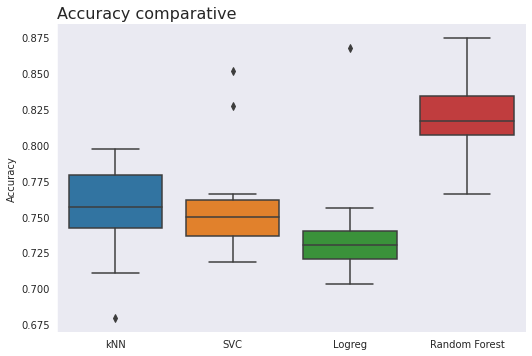

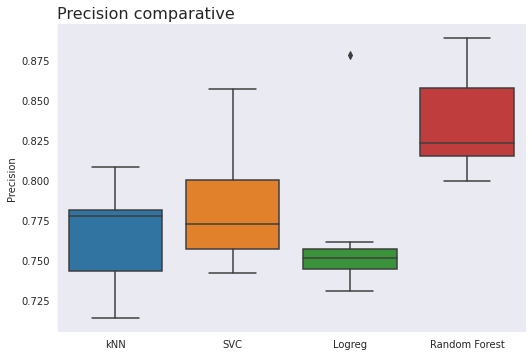

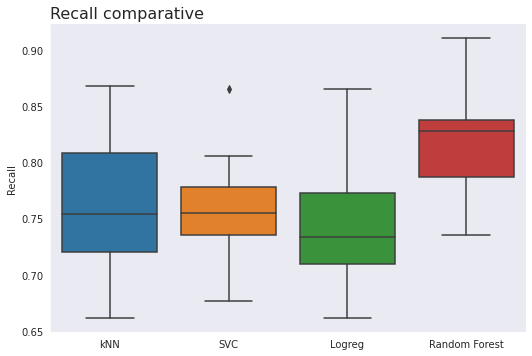

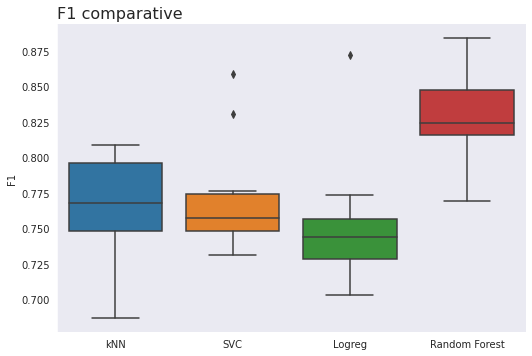

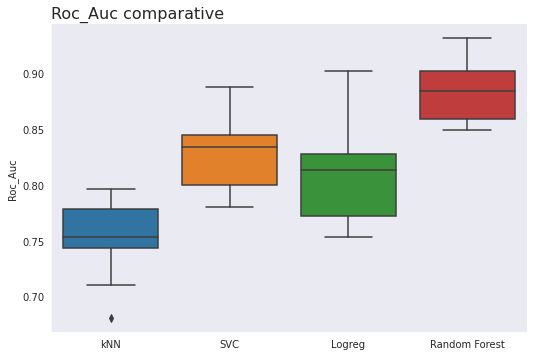

In [50]:
for metric in df_scores['metric'].unique():
    compare_metric(df_scores, metric)